In [2]:
# male_vs_famale

In [3]:
import scvelo as scv
import loompy
import scanpy
#import scanpy.api
import igraph
import phate
import glob, os
import pandas as pd
import os
import re
import subprocess
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import copy


In [4]:
ofile ="20210817_manuscript_preparation.h5ad"

In [5]:
ifile = "/projects/fs1/common/Hongzhe/Hongze_healthy_2020_10_downsampled_1000_2D_overclustered.h5ad"
adata = scv.read(ifile)

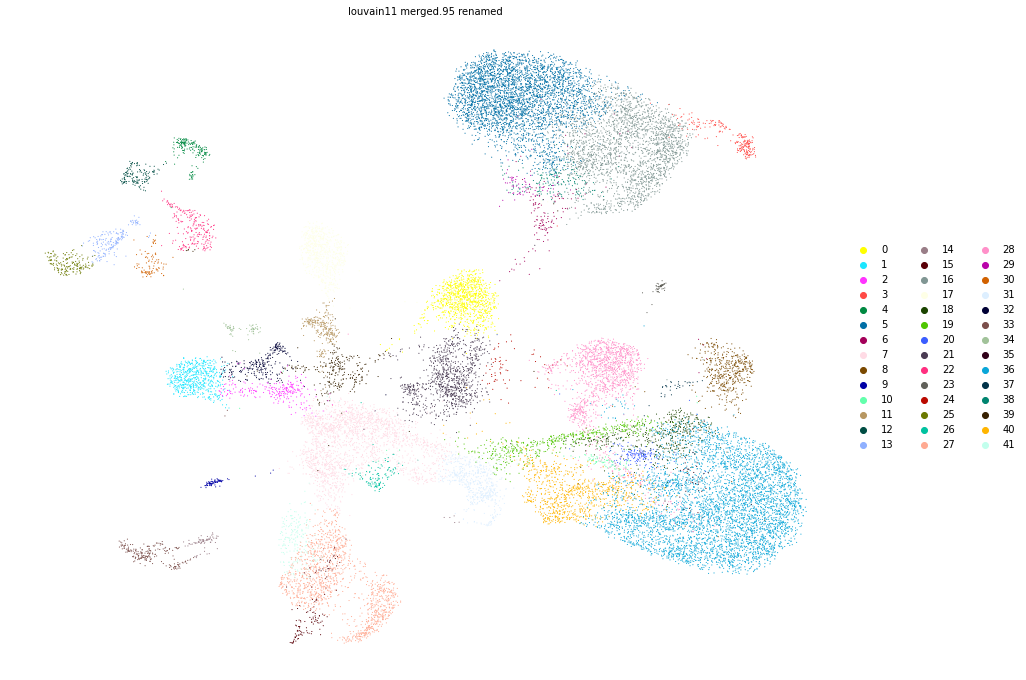

In [7]:
scv.pl.scatter(adata, color='louvain11_merged.95_renamed',figsize=(15,12),legend_loc='right margin' )

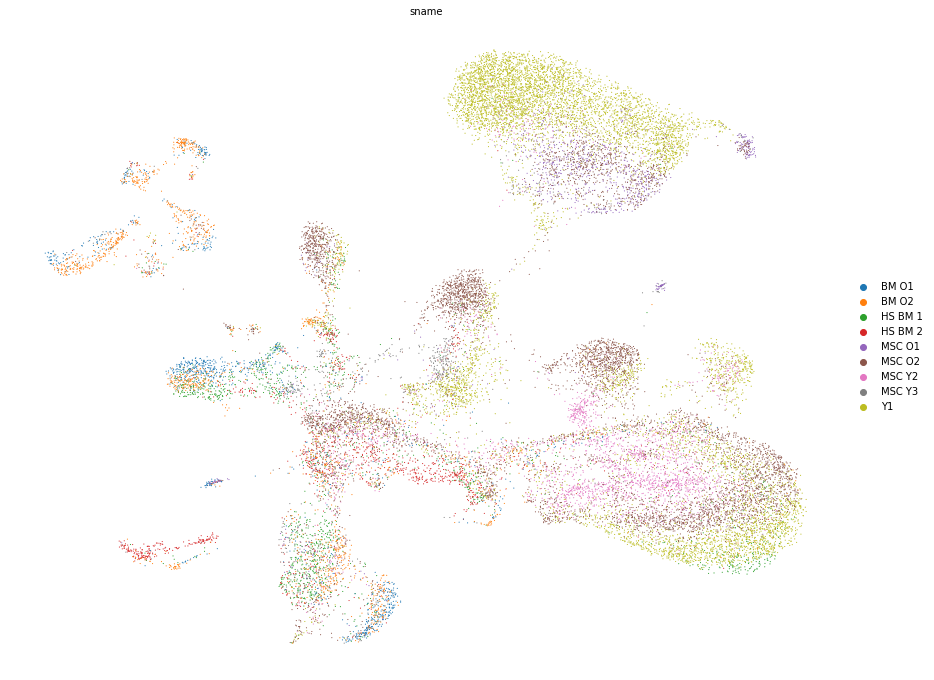

In [25]:
scv.pl.scatter(adata, color='sname',figsize=(15,12),legend_loc='right margin' )

In [9]:
# create female subset

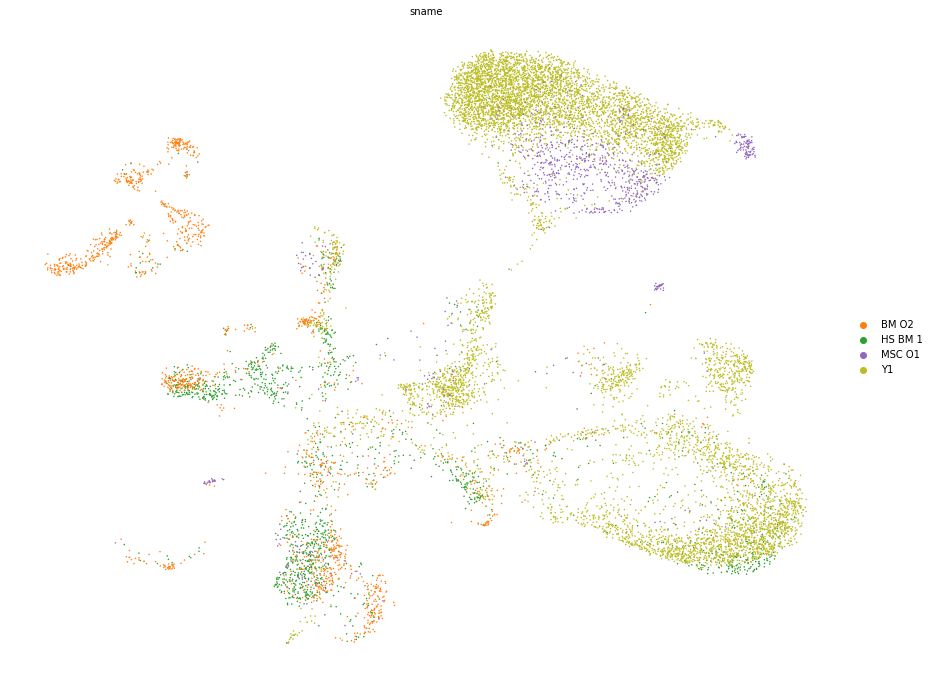

In [13]:
snames = [ 'BM_O2','HS_BM_1','MSC_O1','Y1']
adata_fema = adata[adata.obs["sname"].isin( snames )]
scv.pl.scatter(adata_fema, color='sname',figsize=(15,12),legend_loc='right margin' )

saving figure to file ./figures/scvelo_PECAM1_vmax08_size20.pdf


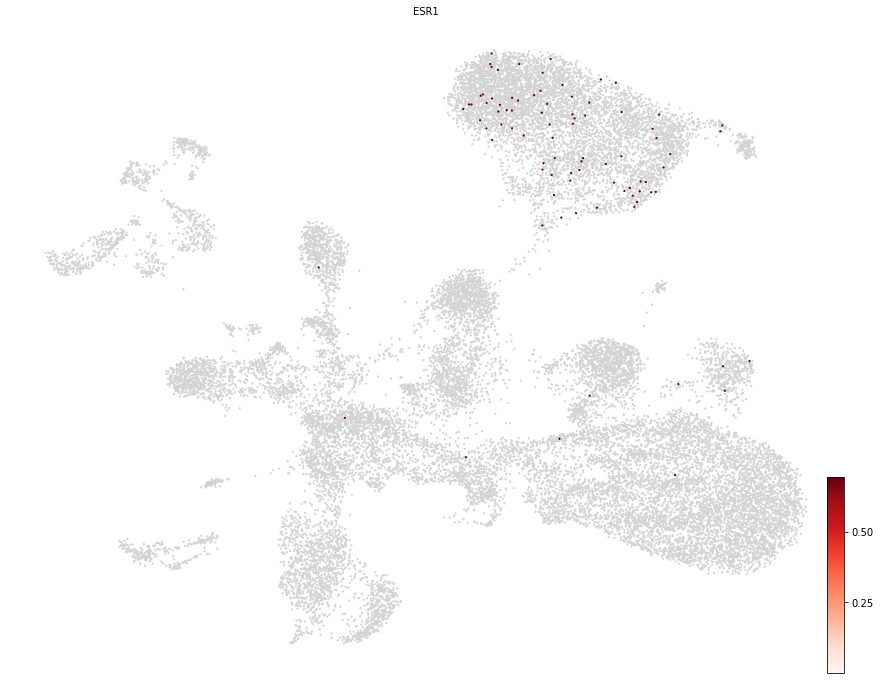

In [34]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata, color='ESR1', cmap=reds, vmin=0.00001, size=20, figsize=(15,12),save='PECAM1_vmax08_size20')


In [ ]:
# create female stromal clusters

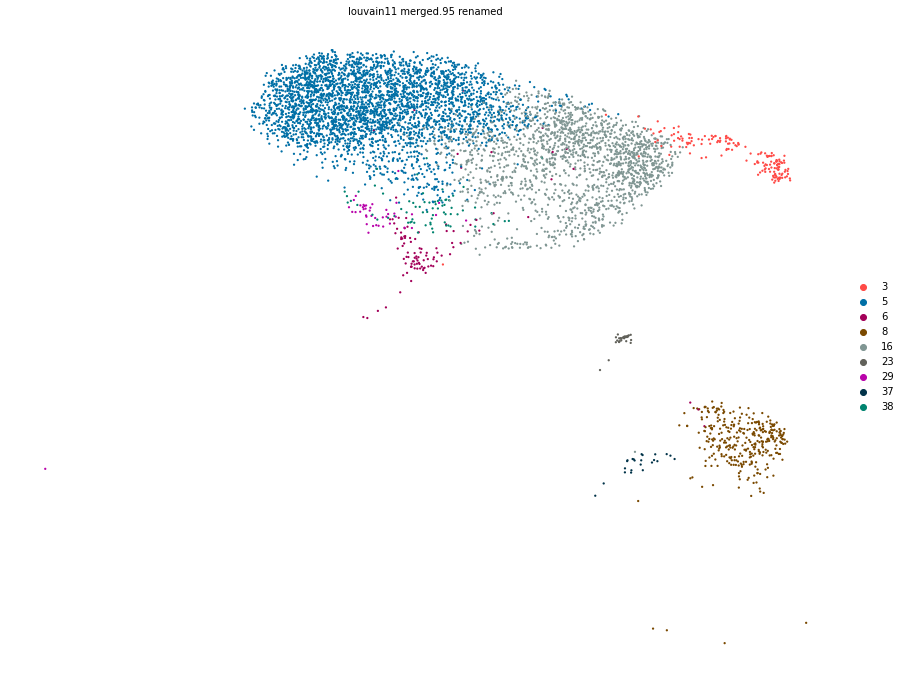

In [20]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37']
adata_fema_stroma = adata_fema[adata_fema.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
scv.pl.scatter(adata_fema_stroma, color='louvain11_merged.95_renamed',figsize=(15,12),legend_loc='right margin' )

In [21]:
# create male subset

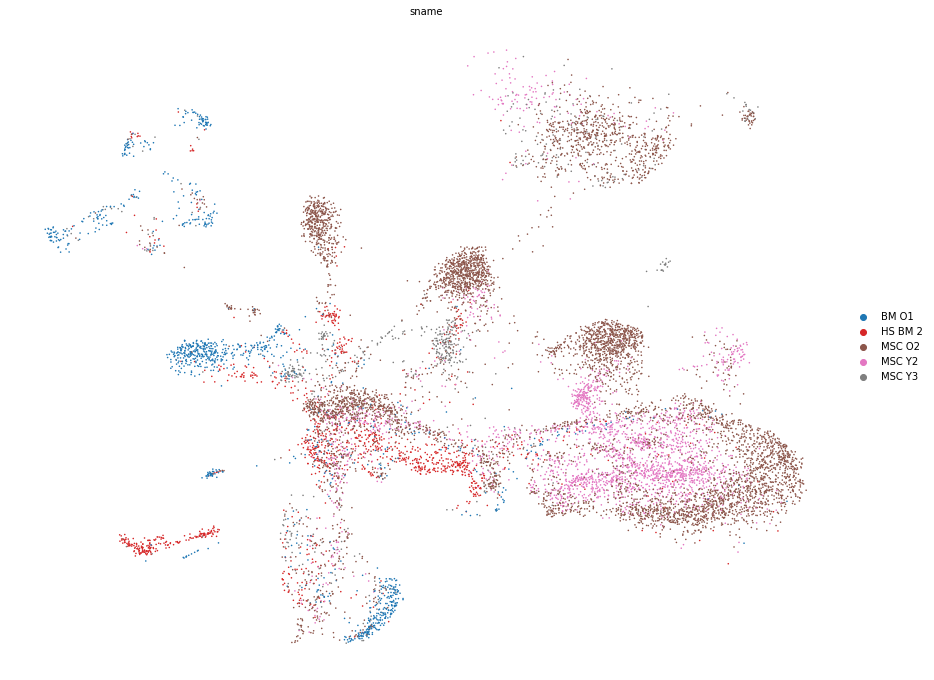

In [22]:
snames = [ 'BM_O1','HS_BM_2','MSC_O2','MSC_Y2','MSC_Y3']
adata_ma = adata[adata.obs["sname"].isin( snames )]
scv.pl.scatter(adata_ma, color='sname',figsize=(15,12),legend_loc='right margin' )

In [ ]:
# create male stromal clusters

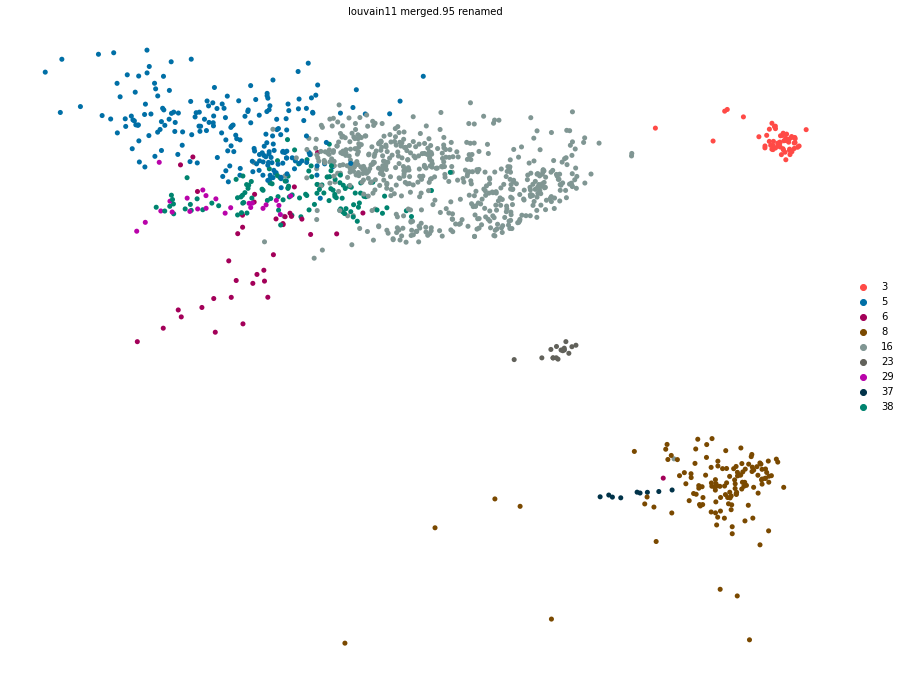

In [23]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37']
adata_ma_stroma = adata_ma[adata_ma.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
scv.pl.scatter(adata_ma_stroma, color='louvain11_merged.95_renamed',figsize=(15,12),legend_loc='right margin' )

saving figure to file ./figures/scvelo_PECAM1_vmax08_size20.pdf


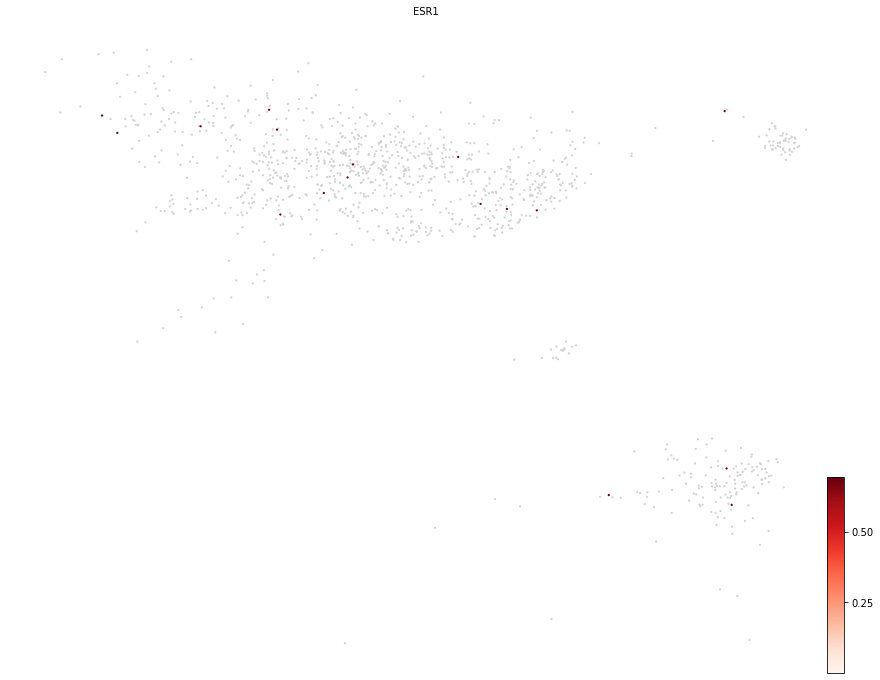

In [44]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata_ma_stroma, color='ESR1', cmap=reds, vmin=0.00001, size=20, figsize=(15,12),save='PECAM1_vmax08_size20')


saving figure to file ./figures/scvelo_PECAM1_vmax08_size20.pdf


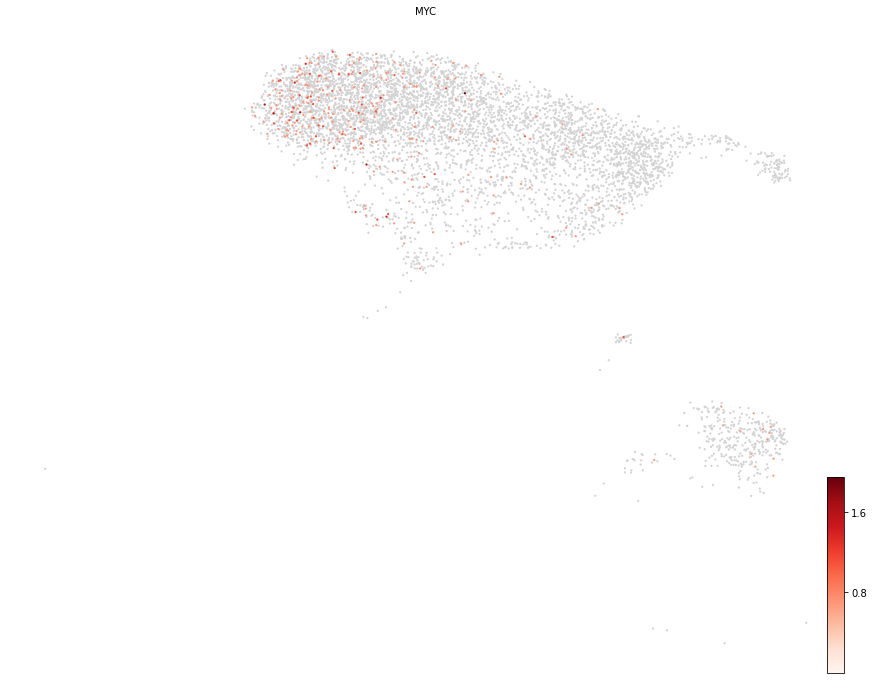

In [72]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata_fema_stroma, color='MYC', cmap=reds, vmin=0.00001, size=20, figsize=(15,12))


In [47]:
# Create stromal subsets

In [45]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37']
adata_MSC = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
lin=('3','5','16','38','29','23','6','37','8')
adata_MSC.obs['louvain11_merged.95_renamed']=adata_MSC.obs['louvain11_merged.95_renamed'].cat.reorder_categories(list(lin),ordered=True)

Trying to set attribute `.obs` of view, copying.


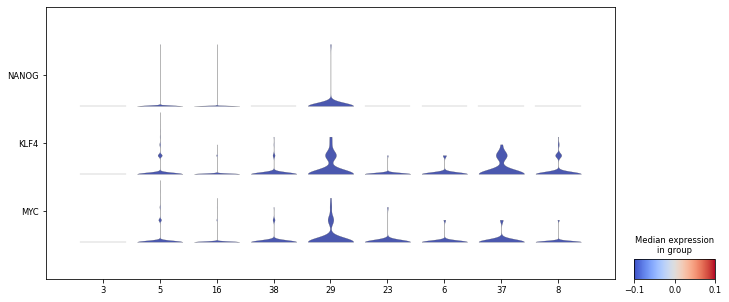

In [73]:
var_names = ['NANOG','KLF4','MYC']

scanpy.pl.stacked_violin(adata_MSC, var_names, groupby='louvain11_merged.95_renamed', swap_axes=True, cmap='coolwarm',figsize=(12,5))